# A little start in classification with iris

In [1]:
# let's import our dependencies
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# I have a small dataset of features of 3 types of flowers. [Sepal length,Sepal width,Petal length,Petal width,Species]
df = pd.read_csv('data.csv')
df.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# first we have to split the data to my relevant features and my labels
data = df[['Sepal length', 'Sepal width', 'Petal length' ,'Petal width']]
labels = df['Species']

In [4]:
# let's fit a on the data and test the data with some predictions
knn = KNeighborsClassifier()
knn.fit(data, labels)
knn.predict(data[0:10])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [5]:
# this looks very well, now we can predict some flowers with our own data. I have no testdata so I will use my own
knn.predict([[4.8,4.7,3.3,1.4]])

array(['Iris-versicolor'], dtype=object)

In [6]:
# Nice, it works!

In [7]:
# I think it would be useful to know the importance of each feature for the result. I think this could be interesting
# for that i need more dependencies
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
# now we can build a forest and calculate the importance of each feature
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=0)


forest.fit(data, labels)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.434589)
2. feature 2 (0.414370)
3. feature 0 (0.090580)
4. feature 1 (0.060461)


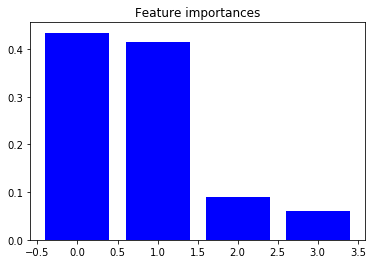

In [55]:
# awesome! Looks like the Petal width and the Petal length are the most important features
# 0.434589 Petal width
# 0.414370 Petal length
# 0.090580 Sepal length
# 0.060461 Sepal width

# so we can plot it for
plt.figure()
plt.title("Feature importances")
plt.bar(range(data.shape[1]), importances[indices], color="b")
plt.show()

In [53]:
# now i can try to do a KNN classifier with only the 2 most relevant features.
# I don't know how dirty the result will be, but we can compare it with the original.

df = df.sample(frac=1)

data_sml = df[['Petal length' ,'Petal width']]
labels_org = df['Species']

train, test = train_test_split(df, test_size = 0.2)

data_org_train = train[['Sepal length', 'Sepal width', 'Petal length' ,'Petal width']]
labels_org_train = train['Species']

data_org_test = test[['Sepal length', 'Sepal width', 'Petal length' ,'Petal width']]
labels_org_test = test['Species']

data_sml_train = train[['Petal length' ,'Petal width']]
data_sml_test = test[['Petal length' ,'Petal width']]

In [54]:
original = []
small = []
for i in range(500):
    
    knn = KNeighborsClassifier()
    knn.fit(data_org_train, labels_org_train)
    original.append(knn.score(data_org_test, labels_org_test))

    knn = KNeighborsClassifier()
    knn.fit(data_sml_train, labels_org_train)
    small.append(knn.score(data_sml_test, labels_org_test))

print ('original-score: ', np.mean(original))
print ('small-score: ', np.mean(small))

original-score:  0.966666666667
small-score:  0.933333333333


It seems like that the original with 4 features is a little little bit better than the smaller dataset. But hey, there are only 2 features and it works very well!